In [2]:
import requests
import pandas as pd
import time
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [3]:
final_table = pd.read_csv('/Users/shreyaskadam/Desktop/Data analyst/Projects/Mutual Fund Performance Tracking/raw_nav_data.csv')

In [4]:
len(final_table['scheme_name'].unique())

35944

In [5]:
final_table.shape

(33619335, 6)

In [6]:
final_table.head()

,date,nav,scheme_code,scheme_name,category,scheme_type
0,29-05-2008,10.7205,100027,Grindlays Super Saver Income Fund-GSSIF-Half Y...,Income,Open Ended Schemes
1,28-05-2008,10.7250,100027,Grindlays Super Saver Income Fund-GSSIF-Half Y...,Income,Open Ended Schemes
2,27-05-2008,10.7216,100027,Grindlays Super Saver Income Fund-GSSIF-Half Y...,Income,Open Ended Schemes
3,26-05-2008,10.7206,100027,Grindlays Super Saver Income Fund-GSSIF-Half Y...,Income,Open Ended Schemes
4,23-05-2008,10.7152,100027,Grindlays Super Saver Income Fund-GSSIF-Half Y...,Income,Open Ended Schemes


In [7]:
final_table.tail()

,date,nav,scheme_code,scheme_name,category,scheme_type
33619330,26-08-2024,10.7244,152570,Tata Nifty Realty Index Fund - Direct Plan - G...,Other Scheme - Index Funds,Open Ended Schemes
33619331,23-08-2024,10.5213,152570,Tata Nifty Realty Index Fund - Direct Plan - G...,Other Scheme - Index Funds,Open Ended Schemes
33619332,22-08-2024,10.7828,152570,Tata Nifty Realty Index Fund - Direct Plan - G...,Other Scheme - Index Funds,Open Ended Schemes
33619333,21-08-2024,10.7324,152570,Tata Nifty Realty Index Fund - Direct Plan - G...,Other Scheme - Index Funds,Open Ended Schemes
33619334,20-08-2024,10.8739,152570,Tata Nifty Realty Index Fund - Direct Plan - G...,Other Scheme - Index Funds,Open Ended Schemes


In [9]:
df = pd.read_csv("/Users/shreyaskadam/Desktop/Data analyst/Projects/Mutual Fund Performance Tracking/raw_nav_data.csv")
print(f"Initial Row count :{len(df)}")

Initial Row count :33619335


In [21]:
# Convert 'date' from text to a real business object
df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y')

In [22]:
# Convert NAV to numbers and coerce means if broken value is present (like 'N/A' then turn it into NaN)
df['nav'] = pd.to_numeric(df['nav'], errors='coerce')

In [23]:
df.dropna(subset=["nav"], inplace = True)

In [24]:
# Ingnoring the "Close Ended" funds because they can't buy/sell easily. Only keeping Open Endedd
df = df[df['scheme_type'].str.contains("Open", na=False)]

In [25]:
# To calculate Growth compare today vs Yesterday
df = df.sort_values(by=['scheme_code','date'], ascending=[True, True])

In [26]:
# This line calculates the day-to-day percentage return of NAV for each mutual fund separately, ensuring a fund’s NAV is compared only with its own previous day value.
df['daily_return'] = df.groupby('scheme_code')['nav'].pct_change()
# Remove the first row of every fund (as it will be nan)
df.dropna(subset=['daily_return'], inplace = True)


In [27]:
df.to_csv("/Users/shreyaskadam/Desktop/Data analyst/Projects/Mutual Fund Performance Tracking/raw_nav_data.csv", index =False)

In [28]:
print(df.head())

          date      nav  scheme_code  \
529 2006-04-04  10.0796       100027   
528 2006-04-05  10.0836       100027   
527 2006-04-07  10.0856       100027   
526 2006-04-10  10.0906       100027   
525 2006-04-12  10.0924       100027   

                                           scheme_name category  \
529  Grindlays Super Saver Income Fund-GSSIF-Half Y...   Income   
528  Grindlays Super Saver Income Fund-GSSIF-Half Y...   Income   
527  Grindlays Super Saver Income Fund-GSSIF-Half Y...   Income   
526  Grindlays Super Saver Income Fund-GSSIF-Half Y...   Income   
525  Grindlays Super Saver Income Fund-GSSIF-Half Y...   Income   

            scheme_type  daily_return  
529  Open Ended Schemes      0.000218  
528  Open Ended Schemes      0.000397  
527  Open Ended Schemes      0.000198  
526  Open Ended Schemes      0.000496  
525  Open Ended Schemes      0.000178  


In [29]:
fund_profile = df.groupby('scheme_name')['daily_return'].agg(['mean','std','min','max','count'])

In [30]:
# Renaming the columns to make them business-friendly
# std is how much the price jumps up and down
fund_profile.columns = ['Average_Return','Risk_Volatility','Worst_Day','Best_Day','Days_Active']

In [31]:
# Only look for funds with one year of Data (approx 252 trading days) as a fund that started last week cannot be accurately ranked
fund_profile = fund_profile[fund_profile['Days_Active'] > 250]

In [32]:
print(fund_profile.head())

                                                    Average_Return  \
scheme_name                                                          
360 ONE Balanced Hybrid Fund - Direct Plan - IDCW         0.000465   
360 ONE Balanced Hybrid Fund - Regular Plan - G...        0.000403   
360 ONE Balanced Hybrid Fund- Direct Plan - Growth        0.000465   
360 ONE Balanced Hyrbrid fund - Regular Plan - ...        0.000403   
360 ONE Dynamic Bond Fund - Regular Plan - Grow...        0.000280   

                                                    Risk_Volatility  \
scheme_name                                                           
360 ONE Balanced Hybrid Fund - Direct Plan - IDCW          0.004323   
360 ONE Balanced Hybrid Fund - Regular Plan - G...         0.004321   
360 ONE Balanced Hybrid Fund- Direct Plan - Growth         0.004323   
360 ONE Balanced Hyrbrid fund - Regular Plan - ...         0.004321   
360 ONE Dynamic Bond Fund - Regular Plan - Grow...         0.001715   

           

In [33]:
# Removing Outliers
fund_profile_clean  = fund_profile[(fund_profile['Best_Day'] < 0.10) & (fund_profile['Worst_Day'] > -0.10)]

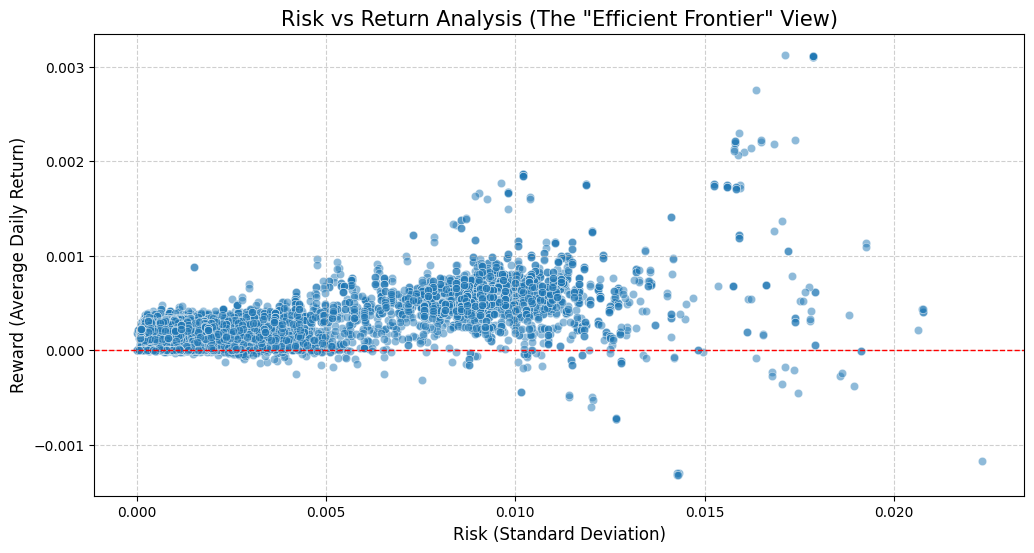

In [34]:
# Visualiaztion Risk vs Return
plt.figure(figsize=(12,6))
sns.scatterplot(data=fund_profile_clean, x="Risk_Volatility", y='Average_Return', alpha = 0.5)
plt.title('Risk vs Return Analysis (The "Efficient Frontier" View)', fontsize=15)
plt.xlabel('Risk (Standard Deviation)', fontsize=12)
plt.ylabel('Reward (Average Daily Return)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
# Add a horizontal line at 0 (Break-even point)
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.show()

Visualising Distribution for Top Fund : Tata Silver Exchange Traded Fund


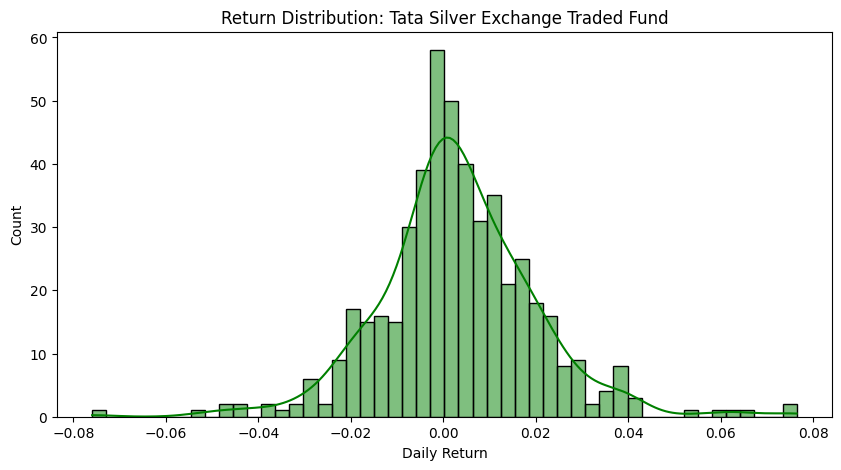

In [35]:
# Returns Distributed among the Top Funds
top_fund_name = fund_profile_clean['Average_Return'].idxmax()
print(f"Visualising Distribution for Top Fund : {top_fund_name}")
# Filtering Data for that fund
top_fund_data = df[df['scheme_name'] == top_fund_name]
plt.figure(figsize=(10, 5))
# bins = split data in 50 bars , kde = add a smooth curve showing distribution
sns.histplot(top_fund_data['daily_return'], kde=True, bins=50, color='green')
plt.title(f'Return Distribution: {top_fund_name}')
plt.xlabel('Daily Return')
plt.show()


In [36]:
# Phase 4 - Annualization (NAV returns are daily but investors think in yearly terms)
# Group by fund name and finding dialy mean ans dialy risk
fund_stats = df.groupby('scheme_name')['daily_return'].agg(['mean','std','count'])

In [37]:
# Remove Funds with less than 1 year of data
fund_stats = fund_stats[fund_stats['count'] > 252 ]


In [38]:
# Create annual return - if a fund returns x per day then annually 
fund_stats['Annual Return'] = fund_stats['mean'] * 252


In [39]:
# Calculating Annual risk 
# Risk compounds with the square root of time because daily returns are independent, so variance adds linearly while standard deviation grows with √time.
fund_stats['Annual_Risk'] = fund_stats['std'] * np.sqrt(252)

In [40]:
fund_stats  = fund_stats.drop(columns=['mean','std','count'])

In [41]:
print(fund_stats.head())

                                                    Annual Return  Annual_Risk
scheme_name                                                                   
360 ONE Balanced Hybrid Fund - Direct Plan - IDCW        0.117082     0.068630
360 ONE Balanced Hybrid Fund - Regular Plan - G...       0.101547     0.068599
360 ONE Balanced Hybrid Fund- Direct Plan - Growth       0.117082     0.068630
360 ONE Balanced Hyrbrid fund - Regular Plan - ...       0.101547     0.068599
360 ONE Dynamic Bond Fund - Regular Plan - Grow...       0.070629     0.027220


In [42]:
# Defining Investor Profiles 
target_conservative  = 0.08 # A "Conservative" investor wants 8% return (Like an FD + a little bit)
target_aggressive = 0.20 # An "Aggressive" investor wants 20% return (To beat the market).

In [43]:
def calculate_z_score(row, target):
    numerator = row['Annual Return'] - target
    denominator  = row['Annual_Risk']

    if denominator == 0:
        return -99
    z_score = numerator/denominator
    return z_score

In [44]:
# Ranking Funds
# Calculating for Conservative Investor target 8%
fund_stats['Z_Conservative'] = fund_stats.apply(lambda row: calculate_z_score(row, target_conservative), axis=1)
# Sort by Z-values
top_conservative = fund_stats.sort_values(by='Z_Conservative', ascending=False).head(10)
print(top_conservative[['Annual Return','Annual_Risk','Z_Conservative']])


                                                    Annual Return  \
scheme_name                                                         
Escorts Mutual Fund Unclaimed Dundee Liquidity ...       0.222676   
Escorts Mutual Fund Unclaimed Dundee Liquidity ...       0.222679   
DWS Cash Opportunities Fund - Direct Plan - Bonus        0.099681   
JPMorgan India Treasury Fund - Direct Plan - An...       0.097047   
ABN AMRO FLEXIBLE SHORT TERM PLAN - SERIES B - ...       0.095948   
ABN AMRO FLEXIBLE SHORT TERM PLAN - SERIES B - ...       0.095820   
BNP PARIBAS LOW DURATION Fund-Institutional Pla...       0.094629   
ABN AMRO FLEXIBLE SHORT TERM PLAN - SERIES C- R...       0.095076   
ABN AMRO FLEXIBLE SHORT TERM PLAN - SERIES C- R...       0.094998   
DHFL Pramerica Treasury Advantage Fund - Direct...       0.105587   

                                                    Annual_Risk  \
scheme_name                                                       
Escorts Mutual Fund Unclaimed Dundee 

In [45]:
# Calculating for Aggressive Investor
fund_stats['Z_Aggressive'] = fund_stats.apply(lambda row: calculate_z_score(row, target_aggressive), axis = 1 )

In [46]:
# Sort By Z-Score
top_aggressive = fund_stats.sort_values(by='Z_Aggressive', ascending=False).head(10)
print(top_aggressive[['Annual Return', 'Annual_Risk', 'Z_Aggressive']])

                                                    Annual Return  \
scheme_name                                                         
Tata Silver Exchange Traded Fund                         0.787410   
Tata Silver ETF Fund of Fund Regular Plan Growt...       0.783601   
Tata Silver ETF Fund of Fund Regular Plan IDCW ...       0.783601   
Tata Silver ETF Fund of Fund Regular Plan IDCW ...       0.783601   
Tata Silver ETF Fund of Fund Direct Plan Growth...       0.781517   
Tata Silver ETF Fund of Fund Direct Plan IDCW P...       0.781517   
Tata Silver ETF Fund of Fund Direct Plan IDCW R...       0.781517   
Edelweiss Silver ETF                                     0.693675   
Tata Gold ETF Fund of Fund Direct Plan Growth O...       0.468875   
Tata Gold ETF Fund of Fund Direct Plan IDCW Pay...       0.468875   

                                                    Annual_Risk  Z_Aggressive  
scheme_name                                                                    
Tata Silver

In [47]:
def get_probability(z_score):
    # This calculates the probability of BEATING the target
    return stats.norm.cdf(z_score) * 100


fund_stats['Prob_Beating_Conservative'] = fund_stats['Z_Conservative'].apply(get_probability)
fund_stats['Prob_Beating_Aggressive'] = fund_stats['Z_Aggressive'].apply(get_probability)

In [48]:
print(fund_stats.sort_values(by='Z_Aggressive', ascending=False).head(5)[['Annual Return', 'Annual_Risk', 'Prob_Beating_Aggressive']])

                                                    Annual Return  \
scheme_name                                                         
Tata Silver Exchange Traded Fund                         0.787410   
Tata Silver ETF Fund of Fund Regular Plan Growt...       0.783601   
Tata Silver ETF Fund of Fund Regular Plan IDCW ...       0.783601   
Tata Silver ETF Fund of Fund Regular Plan IDCW ...       0.783601   
Tata Silver ETF Fund of Fund Direct Plan Growth...       0.781517   

                                                    Annual_Risk  \
scheme_name                                                       
Tata Silver Exchange Traded Fund                       0.271981   
Tata Silver ETF Fund of Fund Regular Plan Growt...     0.283682   
Tata Silver ETF Fund of Fund Regular Plan IDCW ...     0.283682   
Tata Silver ETF Fund of Fund Regular Plan IDCW ...     0.283682   
Tata Silver ETF Fund of Fund Direct Plan Growth...     0.283713   

                                              

In [49]:
report_df = fund_stats.copy()

In [50]:
# Convert "Annual Return" and "Annual Risk" into percentage
report_df['Annual_Return_Pct'] = report_df['Annual Return']*100
report_df['Annual_Risk_Pct'] = report_df['Annual_Risk'] * 100

In [51]:
# Calculate the Chance of Success
def get_prob(z):
    return stats.norm.cdf(z) * 100

In [52]:
# Filtering by the Scheme_name to find funds containing "Growth"
# This plan removes Dividend plan where NAV drop looks like losses
growth_funds = report_df[report_df.index.str.contains("Growth",case=False, na=False)]



In [53]:
# This prevents the recommendation of funds that lost money
growth_funds = growth_funds[growth_funds['Annual_Return_Pct'] > 0]

In [54]:
# We ignore funds with > 50% volatility (likely data glitches or extremely dangerous)
growth_funds = growth_funds[growth_funds['Annual_Risk_Pct'] < 50]

In [55]:
print(f"Total Funds analyzed: {len(report_df)}")
print(f"Funds passing filters (Growth + Profitable): {len(growth_funds)}")

Total Funds analyzed: 11386
Funds passing filters (Growth + Profitable): 3612


In [56]:
def get_best_funds(target_return_pct, top_n=10):
    # Convert user percentage back to decimal for math 
    target_decimal = target_return_pct / 100
    
    # Work on a copy of our filtered list
    analysis = growth_funds.copy()
    
    analysis['User_Z_Score'] = (analysis['Annual Return'] - target_decimal) / analysis['Annual_Risk']
    
    # 2. Calculate Probability
    analysis['Chance_of_Success'] = analysis['User_Z_Score'].apply(get_prob)
    
    # 3. Sort by Z-Score (Highest is best)
    recommendations = analysis.sort_values(by='User_Z_Score', ascending=False).head(top_n)
    
    # 4. formatting columns
    display_cols = ['Annual_Return_Pct', 'Annual_Risk_Pct', 'User_Z_Score', 'Chance_of_Success']
    return recommendations[display_cols]

In [57]:
# ---------------------------------------------------------
# STEP 4: GENERATE FINAL REPORTS
# ---------------------------------------------------------

# Report 1: Conservative (Target 8%)
print("\n---------------------------------------------------------")
print("💰 CONSERVATIVE PORTFOLIO (Target: 8%)")
print("   Criteria: Growth Funds, Positive Returns, Low Risk")
print("---------------------------------------------------------")
conservative_picks = get_best_funds(8)
print(conservative_picks.to_string(formatters={
        'Annual_Return_Pct': '{:,.2f}%'.format,
        'Annual_Risk_Pct': '{:,.2f}%'.format,
        'User_Z_Score': '{:,.2f}'.format,
        'Chance_of_Success': '{:,.1f}%'.format
    }))


---------------------------------------------------------
💰 CONSERVATIVE PORTFOLIO (Target: 8%)
   Criteria: Growth Funds, Positive Returns, Low Risk
---------------------------------------------------------
                                                                                                    Annual_Return_Pct Annual_Risk_Pct User_Z_Score Chance_of_Success
scheme_name                                                                                                                                                         
ABN AMRO FLEXIBLE SHORT TERM PLAN - SERIES B - Regular Plan - Growth Option - Compulsory Redemption             9.59%           0.39%         4.05            100.0%
ABN AMRO FLEXIBLE SHORT TERM PLAN - SERIES B - Regular Plan - Growth Option - Compulsory Renewal                9.58%           0.39%         4.01            100.0%
BNP PARIBAS LOW DURATION Fund-Institutional Plan-Growth Option                                                  9.46%           0.3

In [58]:
# Report 2: Aggressive (Target 15%)
print("\n---------------------------------------------------------")
print("🚀 AGGRESSIVE PORTFOLIO (Target: 15%)")
print("   Criteria: Growth Funds, Positive Returns, Moderate Risk")
print("---------------------------------------------------------")
aggressive_picks = get_best_funds(15)
print(aggressive_picks.to_string(formatters={
        'Annual_Return_Pct': '{:,.2f}%'.format,
        'Annual_Risk_Pct': '{:,.2f}%'.format,
        'User_Z_Score': '{:,.2f}'.format,
        'Chance_of_Success': '{:,.1f}%'.format
    }))


---------------------------------------------------------
🚀 AGGRESSIVE PORTFOLIO (Target: 15%)
   Criteria: Growth Funds, Positive Returns, Moderate Risk
---------------------------------------------------------
                                                           Annual_Return_Pct Annual_Risk_Pct User_Z_Score Chance_of_Success
scheme_name                                                                                                                
Tata Silver ETF Fund of Fund Regular Plan Growth Option               78.36%          28.37%         2.23             98.7%
Tata Silver ETF Fund of Fund Direct Plan Growth Option                78.15%          28.37%         2.23             98.7%
Tata Gold ETF Fund of Fund Direct Plan Growth Option                  46.89%          16.19%         1.97             97.6%
Tata Gold ETF Fund of Fund Regular Plan Growth Option                 46.34%          16.19%         1.94             97.4%
DSP Gold ETF Fund of Fund - Direct - Growth